In [1]:
import locale
import pandas as pd
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
locale.setlocale(locale.LC_ALL, '')

'LC_CTYPE=pt_BR.UTF-8;LC_NUMERIC=pt_BR.UTF-8;LC_TIME=pt_BR.UTF-8;LC_COLLATE=en_US.UTF-8;LC_MONETARY=pt_BR.UTF-8;LC_MESSAGES=en_US.UTF-8;LC_PAPER=pt_BR.UTF-8;LC_NAME=pt_BR.UTF-8;LC_ADDRESS=pt_BR.UTF-8;LC_TELEPHONE=pt_BR.UTF-8;LC_MEASUREMENT=pt_BR.UTF-8;LC_IDENTIFICATION=pt_BR.UTF-8'

In [2]:
#!/usr/bin/env python -W ignore::DeprecationWarning
from IPython.core.display import display,HTML
display(HTML('<style>.prompt{width: 0px; min-width: 0px; visibility: collapse}</style>'))
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
file = 'balneario_camboriu.xlsx'


<img src="balneario_ml/images/invest_logo.png" align="left" width="200">

# Análise de Precificação - Balneário Camboriú

Esta avaliação tem por objetivo a Determinação do Valor de ativo imobiliário, composto por dois terrenos contíguos, localizados na região central de Balneário Camboriú. A avaliação foi feita com base em no potencial do terreno, estudo de massa fornecido por escritório local, coleta de dados públicos, consultas de legislação de uso e ocupação do solo e demais informações necessárias.

A avaliação está estruturada na seguinte ordem:

1. Apresentação do Imóvel e Estudo de Potêncialização do Terreno
2. Análise do valor m² de venda m²
3. Análise de Venda por % do VGV

> O laudo de avaliação de uso restrito. A  divulgação, no  todo  ou em parte das informações contidas neste relatório necessita de prévia autorização da empresa autora.

## Apresentação do Imóvel:

Os terrenos estão localizados na Rua 901, entre a Avenida Brasil e Avenida das nações. Está em centro consolidado, com prédios relativamente baixos. A partir do [voo de drone](https://investrealtypar-my.sharepoint.com/:v:/g/personal/netoluizbezerra_investrealtypar_onmicrosoft_com/EYEz351EXx5FmhI6n4Ufy1YBjde8EYKSRyQpoiO_r1AcjA?e=H8yLsS), é possível perceber que o futuro empreendimento poderá ter vista mar a partir de 60 metros de altura. 

<img src='balneario_ml/images/terreno.jpg' width='900'></tr></table>

A consulta de viabilidade, realizada junto a prefeitura, aponta que não há a identificação de vegetação local, o que limita difculdades de ordem ambiental. 

<img src='balneario_ml/images/viabilidade.png' width='900'></tr></table>

Identificado zoneamento: ZACC | C - Zona de Ambiente Construído Consolidado Qualificado de Alta Densidade, são sugeridos os seguintes quadro de uso:

In [5]:
import viab
file = 'balneario_camboriu.xlsx'

projeto_balneario = viab.Empreendimento(file=file)

In [6]:
list_info = []
list_param = []
list_headers = []
[list_info.append(projeto_balneario.initial_info_list[i][0]) for i in range(len(projeto_balneario.initial_info_list))]
[list_param.append(projeto_balneario.initial_info_list[i][1]) for i in range(len(projeto_balneario.initial_info_list))]
list_headers = ['Informações Gereais do Estudo', 'Parâmetros']
pd.DataFrame(list_param, index=list_info, columns=['Parâmetros'])

,Parâmetros
Zona de ocupação,ZACC – I – C
Uso Pretendido,Misto
Potencial Básico,"3,50 X"
TPC,"0,88 X"
Solo Criado,"0,62 X"
Total,"5,00 X"
Área Privativa Residencial,"2505,00 m²"
Área Privativa Comercial,"350,00 m²"


## Análise de Precificação

In [7]:
df = pd.read_csv('imoveis_balneario_estudo.csv', index_col=None)

In [8]:
from IPython.display import display, Markdown
import pandas as pd

def head(df: pd.DataFrame, n_rows:int=1) -> None:
    """Pretty-print the head of a Pandas table in a Jupyter notebook and show its dimensions."""
    display(Markdown("**Tabela:** {} linhas × {} colunas".format(len(df), len(df.columns))))
    display(df.head(n_rows))

#### Apresentação das Variáveis

In [9]:
head(df,10)

**Tabela:** 3825 linhas × 10 colunas

,area_util,banheiros,vagas,quartos,suites,latitude,longitude,dist_terreno,preco,preco_m2
0,118,4,2,3,3,-26.992302,-48.645103,1.062578,1800000,15254.237288
1,142,5,2,4,4,-26.970453,-48.632767,1.756006,2300000,16197.183099
2,118,4,2,3,3,-26.997900,-48.630600,1.517761,1316000,11152.542373
3,62,1,1,2,0,-26.979924,-48.637427,0.640845,380000,6129.032258
4,96,2,2,3,1,-26.990094,-48.630459,0.844826,1400000,14583.333333
5,170,5,4,4,4,-27.000600,-48.622800,2.202740,2642581,15544.594118
6,237,6,4,4,4,-27.005788,-48.604955,3.919093,7799785,32910.485232
7,162,2,2,3,1,-26.992830,-48.645901,1.160407,960000,5925.925926
8,105,2,2,3,1,-26.971819,-48.636186,1.547698,920000,8761.904762
9,154,4,4,4,4,-27.007000,-48.608100,3.751209,1515000,9837.662338


- Foram extraídos 3.825 dados de acesso público de anuncios em portais da internet. 
- Data de Extração: 15/03/2021
- Será realizado modelo de regressão linear simples, a fim de se obter valor por m² de venda, com base na área privativa, número de banheiros,vagas, quartos, suites, latitude e longitude.

In [10]:
import pandas as pd
import numpy as np
# Import libraries
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure, ColumnDataSource
from bokeh.tile_providers import get_provider, CARTODBPOSITRON
from bokeh.palettes import Turbo256, RdYlGn
from bokeh.transform import linear_cmap,factor_cmap
from bokeh.models import ColorBar, NumeralTickFormatter
import folium
from folium.plugins import HeatMap
import warnings
import pandas as pd  #
import numpy as np  # linear algebra
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
warnings.filterwarnings('ignore')

In [11]:
df['preco'] = np.log1p(df['preco'])
df['area_util'] = np.log1p(df['area_util'])


#### Mapa de calor - Preço por m² dos imóveis em Balneário Camboriú

In [12]:
""" BOKEH MAP """
# Define coord as tuple (lat,long)
dfq1 = df
dfq1['coord'] = list(zip(dfq1['latitude'], dfq1['longitude']))


# Define function to switch from lat/long to mercator coordinates
def x_coord(x, y):
    lat = x
    lon = y

    r_major = 6378137.000
    x = r_major * np.radians(lon)
    scale = x / lon
    y = 180.0 / np.pi * np.log(np.tan(np.pi / 4.0 +
                                      lat * (np.pi / 180.0) / 2.0)) * scale
    return (x, y)


# Obtain list of mercator coordinates
mercators = [x_coord(x, y) for x, y in dfq1['coord'] ]

# Create column mercator
dfq1['mercator'] = mercators

# Define columns mercator_x and mercator_y
dfq1[['mercator_x', 'mercator_y']] = dfq1['mercator'].apply(pd.Series)

# Preview relevant columns
dfq1[['mercator_x', 'mercator_y', 'preco']].head()

# Create map with Bokeh

# Set underlying map
chosentile = get_provider(CARTODBPOSITRON)

# Set palette
palette = Turbo256

# Set source to dfq1
source = ColumnDataSource(data=dfq1)

# Define color mapper
color_mapper = linear_cmap(field_name = 'preco_m2', palette = palette, low = np.expm1(df['preco_m2']).min(),
                                 high = np.expm1(dfq1['preco_m2']).max())

# Set tooltips
#nan_color = '#d9d9d9'
tooltips = [("Preço","@preco_m2")]


# Create figure
p = figure(title = 'Mapa de Calor - Ofertas Disponíveis em Balneário Camboriú nos Principais Portais da Internet', x_axis_type="mercator", y_axis_type="mercator",
           x_axis_label = 'Longitude', y_axis_label = 'Latitude', tooltips = tooltips, aspect_ratio=1.5, width=1000)

# Add map tile
p.add_tile(chosentile)


# Add points using mercator coordinates
p.circle(x = 'mercator_x', y = 'mercator_y', color = color_mapper, source=source)

#Defines color bar
color_bar = ColorBar(color_mapper=color_mapper['transform'],
                     formatter = NumeralTickFormatter(format="0,0"),
                     label_standoff = 13, width=12, location=(0,0))

# Set color_bar location
p.add_layout(color_bar, 'right')

# Display in notebook
output_notebook()

# Show map
show(p)


Loading BokehJS ...

#### Gráfico de Dispersão - Preço por m² X Área Privativa dos imóveis em Balneário Camboriú

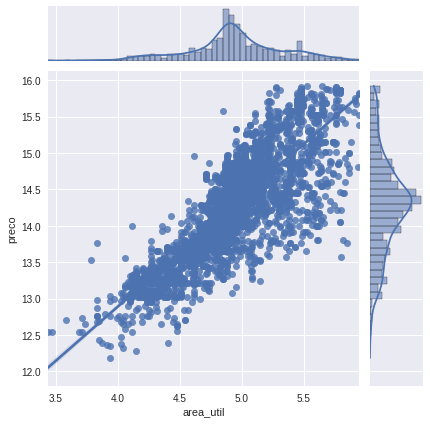

In [13]:
# Define list of continuous variables
cont_feat = ['area_util']


#  Plot jointplots
for feature in cont_feat:
    sns.jointplot(x = df[feature], y = df['preco'], kind = 'reg')

In [16]:
import geopandas as gpd
from keplergl import KeplerGl
from IPython.display import IFrame
n_borders = gpd.read_file('maps/balneario/bc_shp.shp')
%run config_hexbin.py

<Figure size 576x396 with 0 Axes>

#### Análise Geográfica do Preço por m²

In [17]:
map_2 = KeplerGl(height=600,
                     data={"Balneario": df,
                           "Boundaries": n_borders},
                     config=config)


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [1]:
map_2

NameError: name 'map_2' is not defined

In [2]:
from IPython.display import IFrame
IFrame(src='./first_map.html', width=1200, height=600)


In [ ]:
# Redefine X_train and y_train
X_train = df.drop(['preco','longitude', 'latitude', 'preco_m2', 'coord', 'mercator', "mercator_x", 'mercator_y'], axis = 1)
y_train = df['preco']


#### Modelagem do Preço por M² - Regressão Linear

In [ ]:
# Create model in OLS
X_int = sm.add_constant(X_train)
model = sm.OLS(y_train, X_int).fit()
summary = model.summary()
summary

In [ ]:
# Modeling

In [ ]:
# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train, y_train)

# Evaluate using rmse
scores = cross_val_score(
            linreg, 
            X_train,
            y_train,
            cv=10,
            scoring="neg_mean_squared_error"
)


In [ ]:
from sklearn.metrics import mean_squared_error
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train, y_train)

rmse_simple = (rmsle(np.expm1(y_train), np.expm1(linreg.predict(X_train))))

# Evaluate using rmse
scores = cross_val_score(
            linreg,
            X_train,
            y_train,
            cv=10,
            scoring="neg_mean_squared_error"
)



In [ ]:
 X_train.loc[0] = [np.log1p(145), 4, 2, 4, 4, 0] 

In [ ]:
y_pred = linreg.predict(np.asarray(X_train.loc[0]).reshape(1, -1))
preco_m2 = np.expm1(y_pred)/145
preco_m2 = preco_m2[0]

In [ ]:
print("O R$/m² sugerido através do modelo de regressão para um apratamento de 4 quartos, 4 suites, com 2 vagas e área de 145 m² é de: ","%.2f" % round(preco_m2, 2))

#### Análise do Nível de Ajuste do Modelo

Conforme pode-se verificar no gráfico Q-Q abaixo, comparando dados normais independentes gerados aleatoriamente no eixo vertical a uma população normal padrão no eixo horizontal. A linearidade dos pontos sugere que os dados são normalmente distribuídos, corroborando com a validade estatística do modelo e dos valor de m² de venda sugerido.

In [ ]:
# QQ-plot of residuals
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, alpha = 0.3, line='45', fit=True)
fig.show()

### Benchmark Selecionado
O edifício Portinax encontra-se na rua vizinha, paralela aos terrenos com distância do mar equivalente. O produto para os terrenos em questão deverão ter qualidade, padrão de acabamento e programa parecidos, inclusive tomando-se partido do potencial de vista mar que o terreno possue.

<img src='balneario_ml/images/comp_1.png' width='900'></tr></table>

<img src='balneario_ml/images/comp_2.png' width='900'></tr></table>

<img src='balneario_ml/images/comp_3.png' width='900'></tr></table>

#### Análise dos Valores de Benchmark

<img src='balneario_ml/images/bench.png' width='600'></tr></table>

Conforme modelo e análise de benchmark, obteve-se os respectivos valores de 13.346 reais/m² e 14.237,73 reais/m².Aplicando um deflator sobre a média dos dois valores obtemos o resultado de 11.000,00 reais/m² como valor conservador e 12.500,00 reais/m² como base case para lançamento. Vis-à-vis este patamar de valor de m² de venda, sugere-se um percentual entre 12,5% à 17,5% para permuta financeira.

<img src='balneario_ml/images/precificacao.png' width='600'></tr></table>

# Conclusão

Valor de venda sugerido para os terrenos deve estar no intervalo entre 3.925.625 reais e 6.245.312 reais